In [135]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=5)

In [286]:
# Define the problem to solve
def problem():
    X = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]).T
    Y = np.array([[   0,         1,         1,         0,         1,         0,         0,         1    ]])
    return X, Y

In [137]:
# Initialize weights and biases
def initialize_network(nodes_per_layer, scaling = 1):
#    W01 = np.random.randn(2, 2) * 0.5  # 2 neurons times 2 inputs
#    B01 = np.zeros((2, 1))  # 2 neurons times 1 bias
#    W12 = np.random.randn(1, 2) * 0.5  # 1 neuron times 2 inputs
#    B12 = np.zeros((1, 1))  # 1 neuron times 1 bias
    network = []
    for i in range(len(nodes_per_layer)-1):
        rows = nodes_per_layer[i+1]
        columns = nodes_per_layer[i]
        W = np.random.randn(rows, columns) * scaling
        B = np.zeros((rows, 1))
        layer = W, B
        network.append(layer)
    return network
        

In [153]:
def forward(network, inputs, expected_outputs = None):
    sigmoid = lambda a : 1 / (1 + np.exp(-a))
    A = inputs
    cache = [A]
    for layer in network:
        W, B = layer
        Z = W.dot(A) + B
        A = sigmoid(Z)
        cache.append(A)
        
    if expected_outputs is np.array:
        return cache, A
    else:
        m = expected_outputs.shape[1] 
        cost = 1 / m * np.sum((expected_outputs - A) ** 2)
        return cache, A, cost

In [275]:
def backward(network, cache, Y, learning_rate = 0.1):
    sigmoid_mirp = lambda y: y * (1 - y)
    m = Y.shape[1]
    n = len(network)
    i = n - 1
    A = cache
    der = sigmoid_mirp(A[n])
    #print("der =", der)
    deltaA2 = (Y - A[n]) * der
    #print("Y = ", Y)
    #print("A[" + str(n) +"] = ", A[n])
    #print("deltaA2 = ", deltaA2)
    W2, B2 = network[i]
    deltaA1 = deltaA2.T.dot(W2).T * sigmoid_mirp(A[i])
    #print("deltaA1 =", deltaA1) 
    
    deltaW2 = A[1].dot(deltaA2.T).T
    #print("deltaW2 =", deltaW2, "\nW2 =", W2)
    assert(deltaW2.shape == W2.shape)
    W2 = W2 + deltaW2 * learning_rate
    dB2 = 1 / m * np.sum(deltaA2, axis = 1, keepdims = True) * learning_rate
    B2 = B2 + dB2
    #print("W2 =", W2)
    network[i] = W2, B2
    
    i = i - 1
    W1, B1 = network[i]
    deltaW1 = A[0].dot(deltaA1.T).T * learning_rate
    assert(deltaW1.shape == W1.shape)
    W1 = W1 + deltaW1
    dB1 = 1 / m * np.sum(deltaA1, axis = 1, keepdims = True) * learning_rate
    B1 = B1 + dB1
    network[i] = W1, B1
    return network  

0 0.25157214780104253 [[0.45887 0.46009 0.45738 0.4586  0.46216 0.46337 0.46067 0.46189]]
10000 0.24999800720030976 [[0.4993  0.50024 0.49897 0.49992 0.50008 0.50101 0.49976 0.50071]]
20000 0.24999324872973946 [[0.49936 0.50056 0.49898 0.50017 0.49984 0.501   0.49946 0.50067]]
30000 0.2498796184237061 [[0.49738 0.50327 0.49343 0.4992  0.50099 0.50597 0.49701 0.50296]]
Found solution after #34092 epochs
[[0.38574 0.65369 0.50027 0.35446 0.62154 0.44104 0.3511  0.68066]]
[(array([[-0.20788,  0.48421, -0.37528],
       [ 0.33628, -0.75158,  0.50673],
       [ 0.26009, -0.73585,  0.73219],
       [ 0.46782, -0.67049,  0.55579],
       [-0.2144 ,  0.06239,  0.02695],
       [ 3.18047, -4.31998,  3.10879],
       [ 0.25166, -0.85454,  1.00228],
       [ 0.11864, -0.29902,  0.09325],
       [ 0.56073, -0.51924,  0.72667],
       [ 0.2113 , -0.23503,  0.19636],
       [-0.19011,  0.26094, -0.37938],
       [-1.36323,  1.45747,  0.33599]]), array([[-4.74687e-04],
       [ 1.91085e-03],
       [

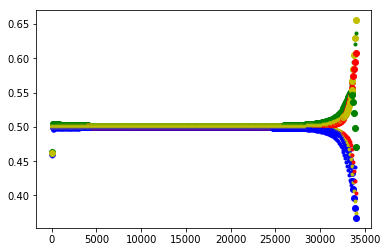

In [293]:
X, Y = problem()
network = initialize_network([3,12,1], 0.1)
cache, Yhat, cost = forward(network, X, Y)
assert(Yhat.shape == (1,8))

dot = ['r.', 'g.', 'b.', 'y.', 'ro', 'go', 'bo', 'yo']
for epoch in range(100000):
    #print(epoch)
    cache, Yhat, cost = forward(network, X, Y)
    assert(Yhat.shape == (1,8))
    if ((Yhat>0.5)*1 == Y).all():
        print("Found solution after #{} epochs".format(epoch))
        print(Yhat)
        print(network)
        break
    if epoch % 100 == 0:
        #plt.plot(epoch, cost, 'r.')
        if epoch % 10000 == 0:
            print(epoch, cost, Yhat)
        for i in range(Yhat.shape[1]):
            plt.plot(epoch, Yhat[0][i], dot[i])
    #print(network)
    network = backward(network, cache, Y, learning_rate = 0.1)
    #print(network)
    
print(Yhat)
print((Yhat>0.5)*1)
plt.show()

In [280]:
np.array([True]).all()

True